In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
from scipy.io import wavfile

path = "SoundDataWithPreprocessing.xlsx"
df = pd.read_excel(path)

In [2]:
#inspect the data
print(df.columns)
print(50*"-")
print(df.dtypes)
print(50*"-")
print(df.isna().sum())
print(50*"-")

Index(['Unnamed: 0', 'file', 'is_background', 'date_time', 'location',
       'speed_kmh', 'sample_pos', 'daytime', 'weather', 'vehicle',
       'source_direction', 'microphone', 'channel', 'decibel', 'Dezibel_ber'],
      dtype='object')
--------------------------------------------------
Unnamed: 0            int64
file                 object
is_background          bool
date_time            object
location             object
speed_kmh            object
sample_pos            int64
daytime              object
weather              object
vehicle              object
source_direction     object
microphone           object
channel              object
decibel             float64
Dezibel_ber         float64
dtype: object
--------------------------------------------------
Unnamed: 0             0
file                   0
is_background          0
date_time              0
location               0
speed_kmh              0
sample_pos             0
daytime             8144
weather             8144


In [3]:
#change dtypes
cat = ["location", "speed_kmh", "daytime", "weather", "vehicle", "source_direction", "microphone", "channel"]

for col in df.columns: 
    if col in cat: 
        df[col] = df[col].astype("category")

df["date_time"] = pd.to_datetime(df["date_time"], format='%Y-%m-%d-%H-%M')

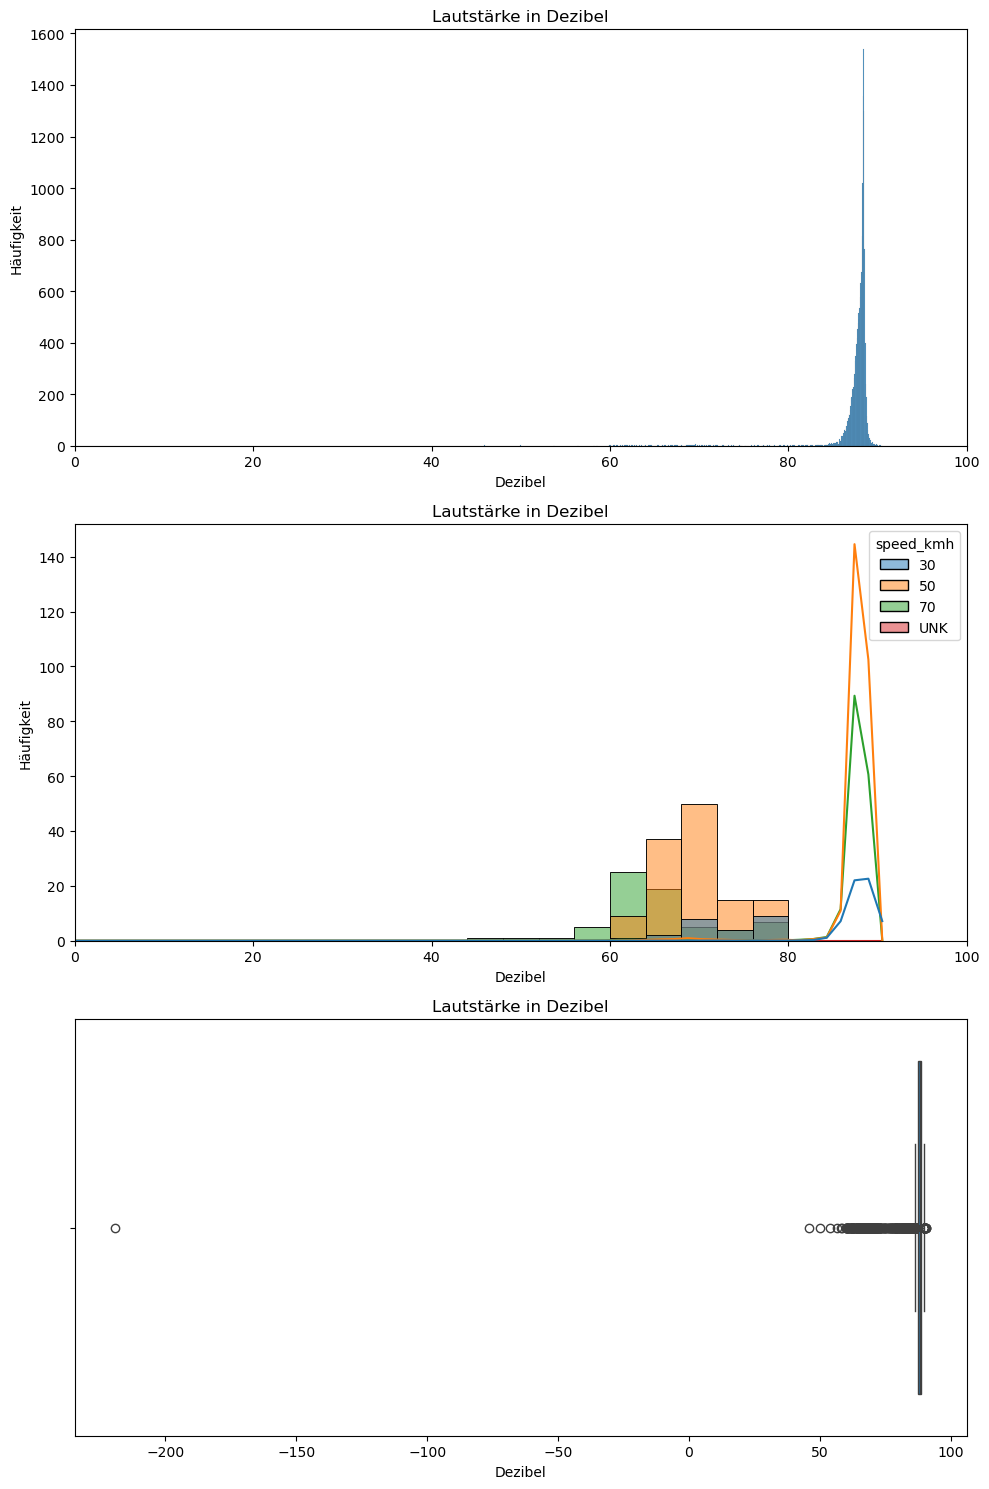

In [9]:
#distribution decibel 
decibel_min = df["Dezibel_ber"].min()
decibel_max = df["Dezibel_ber"].max()

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(data=df, x="Dezibel_ber",  binrange=(0, 100), kde=False, ax=axes[0])
axes[0].set_title("Lautstärke in Dezibel")
axes[0].set_xlabel("Dezibel")
axes[0].set_ylabel("Häufigkeit")
axes[0].set_xlim(0,100)

sns.histplot(data=df, x="Dezibel_ber", bins=20,  binrange=(0, 80), kde=True, ax=axes[1], hue="speed_kmh")
axes[1].set_title("Lautstärke in Dezibel")
axes[1].set_xlabel("Dezibel")
axes[1].set_ylabel("Häufigkeit")
axes[1].set_xlim(0,100)

sns.boxplot(data=df, x="Dezibel_ber", ax=axes[2])
axes[2].set_title("Lautstärke in Dezibel")
axes[2].set_xlabel("Dezibel")


plt.tight_layout()

plt.savefig("data_exploratoin.png")



In [6]:
#sample pos
pos = df["sample_pos"].sort_values()
print(pos)



8849          8866
8850          8866
7828          9080
7827          9080
16037         9192
           ...    
14811    167706624
14814    168715520
14815    168757760
14822    170014719
14823    170014719
Name: sample_pos, Length: 17506, dtype: int64


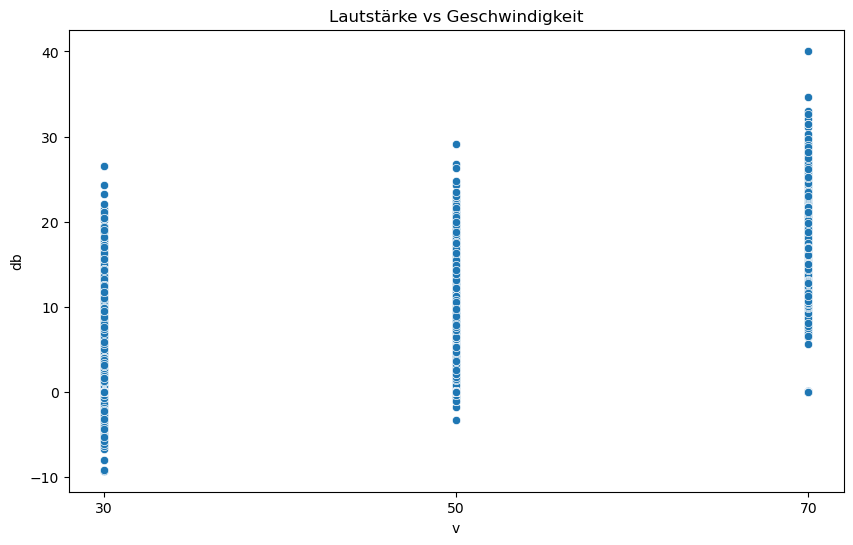

In [7]:
#Scatterplot speed vs decibel 
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x="speed_kmh", y="decibel")
plt.title("Lautstärke vs Geschwindigkeit")
plt.xlabel("v")
plt.ylabel("db")
plt.show()


1.1653147492288358


/Users/janikwahrheit/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


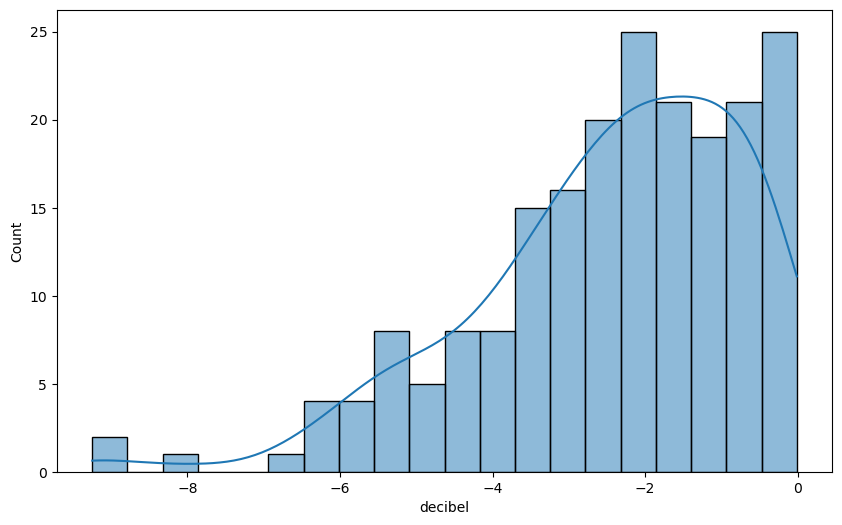

In [8]:
decibel_negative = df[df["decibel"] < 0]
decibel_negative = decibel_negative.reset_index()
print((decibel_negative.shape[0]/df.shape[0])*100)
decibel_negative.loc[0, "file"]

#plot negativce decibel 
plt.figure(figsize=(10, 6))
sns.histplot(data=decibel_negative, x="decibel", bins=20, kde=True)
plt.show()


count    8225.000000
mean        0.009608
std         0.061287
min         0.000176
25%         0.000794
50%         0.001642
75%         0.004174
max         0.997885
Name: decibel, dtype: float64


/Users/janikwahrheit/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


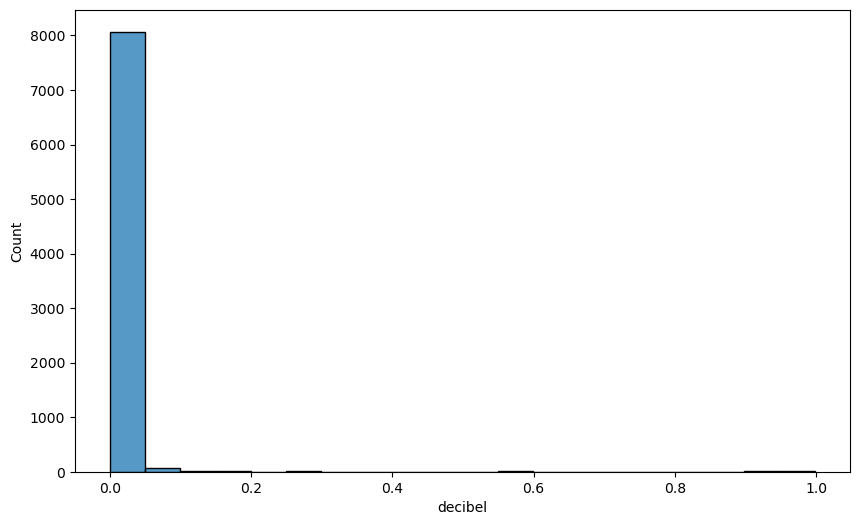

In [9]:
decibel_small = df[(df["decibel"] < 1) & (df["decibel"] > 0)]
print(decibel_small["decibel"].describe())
plt.figure(figsize=(10, 6))
sns.histplot(data=decibel_small, x="decibel", bins=20)
plt.show()
